In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import random as rand

In [2]:
def random_border_variation(percentage_variation):
    variation=0
    if percentage_variation != 0:
        variation = (rand.randint(0,percentage_variation*2)-percentage_variation*0.8)/100
    return 1+variation

class TankOnlyDataset:
    def __init__(self, images_dir, labels_dir, output_images_dir, output_labels_dir):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.output_images_dir = output_images_dir
        self.output_labels_dir = output_labels_dir
        
        # Ensure output directories exist
        os.makedirs(output_images_dir, exist_ok=True)
        os.makedirs(output_labels_dir, exist_ok=True)
        
        # Generate images and labels
        self.generate_images_and_labels()

    def generate_images_and_labels(self):
        image_files = os.listdir(self.images_dir)
        
        percentage_variation_parameter = 33 #Use this to change border position randomly of a x percentage
        
        for img_name in image_files:
            # Load image
            image_path = os.path.join(self.images_dir, img_name)
            image = Image.open(image_path)
            
            # Load labels from corresponding file
            label_path = os.path.join(self.labels_dir, img_name.replace('.jpg', '.txt'))
            with open(label_path, 'r') as file:
                lines = file.readlines()
                
            for i, line in enumerate(lines):
                # Parse label information
                parts = line.split()
                class_label = parts[0]
                x_center = int(float(parts[1]) * image.width)
                y_center = int(float(parts[2]) * image.height)
                width = int(float(parts[3]) * image.width)
                height = int(float(parts[4]) * image.height)
                
                # Calculate bounding box coordinates
                x1_variation=random_border_variation(percentage_variation_parameter)
                x1 = max(0, x_center - width* x1_variation // 2)
                
                y1_variation=random_border_variation(percentage_variation_parameter)
                y1 = max(0, y_center - height* y1_variation // 2)
                
                x2 = min(image.width, x_center + width* (2-x1_variation) // 2)
                
                y2 = min(image.height, y_center + height* (2*y1_variation) // 2)
                
                if y2-y1>x2-x1:
                    x2=x1+y2-y1
                else:
                    y2=y1+x2-x1
                # Check if cropped image dimensions are valid
                if x1 < x2 and y1 < y2:
                    # Crop and save the image
                    cropped_image = image.crop((x1, y1, x2, y2))
                    cropped_img_name = f"{os.path.splitext(img_name)[0]}_{i}.jpg"
                    cropped_image.save(os.path.join(self.output_images_dir, cropped_img_name))
                    
                    # Save label information to txt file
                    label_txt_name = f"{os.path.splitext(img_name)[0]}_{i}.txt"
                    label_txt_path = os.path.join(self.output_labels_dir, label_txt_name)
                    with open(label_txt_path, 'w') as label_file:
                        label_file.write(f"{class_label} {x1_variation} {y1_variation} {x_center} {y_center}\n")
                else:
                    print(f"Warning: Empty image detected for {img_name}, skipping...")
                    

# Example usage
images_dir = 'synthetic_images/images'
labels_dir = 'synthetic_images/labels'
output_images_dir = 'Mixed/images'
output_labels_dir = 'Mixed/labels'

dataset = TankOnlyDataset(images_dir, labels_dir, output_images_dir, output_labels_dir)



In [4]:
def random_background_borders(width,height):
    x_center = rand.randint(0,width)
    y_center = rand.randint(0,height)
    first_variation = rand.randint(0, width//6)
    second_variation = rand.randint(0, width//6)
    x1 = max(0,x_center-first_variation)
    y1 = max(0,y_center-first_variation)
    x2 = min(width,x_center+second_variation)
    y2 = min(height,y_center+second_variation)
    return x1,y1,x2,y2

class BackgroundOnlyDataset:
    def __init__(self, generated_backgrounds, images_dir, output_images_dir, output_labels_dir):
        self.generated_backgrounds = generated_backgrounds
        self.images_dir = images_dir
        self.output_images_dir = output_images_dir
        self.output_labels_dir = output_labels_dir
        
        # Ensure output directories exist
        os.makedirs(output_images_dir, exist_ok=True)
        os.makedirs(output_labels_dir, exist_ok=True)
        
        # Generate images and labels
        self.generate_images_and_labels(generated_backgrounds)

    def generate_images_and_labels(self,generated_backgrounds):
        image_files = os.listdir(self.images_dir)
            
        for img_name in image_files:
            # Load image
            image_path = os.path.join(self.images_dir, img_name)
            if image_path.endswith((".jpg",".png","JPG","PNG")):
                image = Image.open(image_path)
                
                for i in range(0,generated_backgrounds):
                    x1,y1,x2,y2 = random_background_borders(image.width,image.height)
                    
                    # Check if cropped image dimensions are valid
                    if x1 < x2 and y1 < y2:
                        # Crop and save the image
                        cropped_image = image.crop((x1, y1, x2, y2))
                        cropped_img_name = f"{os.path.splitext(img_name)[0]}_{i}.jpg"
                        cropped_image.save(os.path.join(self.output_images_dir, cropped_img_name))
                        
                        # Save label information to txt file
                        label_txt_name = f"{os.path.splitext(img_name)[0]}_{i}.txt"
                        label_txt_path = os.path.join(self.output_labels_dir, label_txt_name)
                        with open(label_txt_path, 'w') as label_file:
                            label_file.write(f"{12}\n")
                    else:
                        print(f"Warning: Empty image detected for {img_name}, skipping...")
                    

# Example usage
images_dir_risikotable = 'backgrounds'
images_dir_general = 'backgrounds/General/'
output_images_dir = 'Mixed/images'
output_labels_dir = 'Mixed/labels'

BackgroundOnlyDataset(100, images_dir_risikotable, output_images_dir, output_labels_dir)
BackgroundOnlyDataset(2, images_dir_general, output_images_dir, output_labels_dir)


In [5]:
#dataset = CustomDataset(images_dir, labels_dir, output_images_dir, output_labels_dir)

print(len(os.listdir('crop_dataset/images')))
print(len(os.listdir('crop_dataset/labels')))

53157
53157


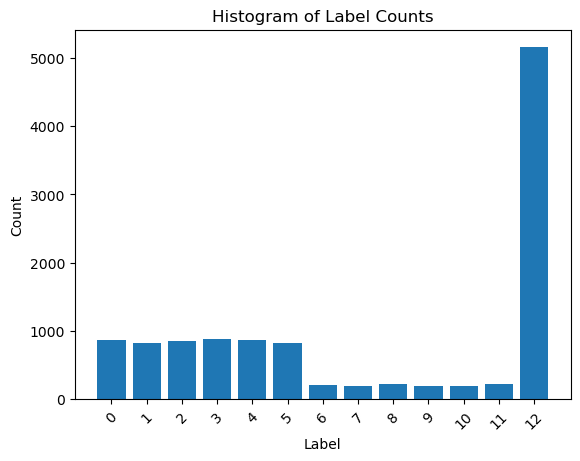

In [6]:
import os
import matplotlib.pyplot as plt

# Define the directory containing the labels files
labels_dir = 'Mixed/labels'

# Initialize a dictionary to store label counts with all possible labels
all_labels = [str(i) for i in range(13)]  # Assuming labels are numbers from 0 to 11
label_counts = {label: 0 for label in all_labels}

# Iterate over all text files in the labels folder
for label_file in os.listdir(labels_dir):
    # Read the contents of the label file
    label_file_path = os.path.join(labels_dir, label_file)
    with open(label_file_path, 'r') as file:
        label = file.readlines(0)
        label = label[0].split()
        label_counts[label[0]] = label_counts[label[0]] + 1

# Plot the histogram of label counts
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Histogram of Label Counts')
plt.xticks(rotation=45)

# Set y-axis limits to start from zero
plt.ylim(0)

plt.show()



In [7]:
print((label_counts.values()), sep="\n")
for key, value in zip(label_counts.keys(), label_counts.values()):
    print(key, value)

dict_values([865, 818, 860, 887, 872, 819, 212, 195, 218, 194, 189, 221, 5154])
0 865
1 818
2 860
3 887
4 872
5 819
6 212
7 195
8 218
9 194
10 189
11 221
12 5154
